In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Step 1: Load the dataset
file_path = "NFLX (1).csv"  # Update with correct path
df = pd.read_csv(file_path)



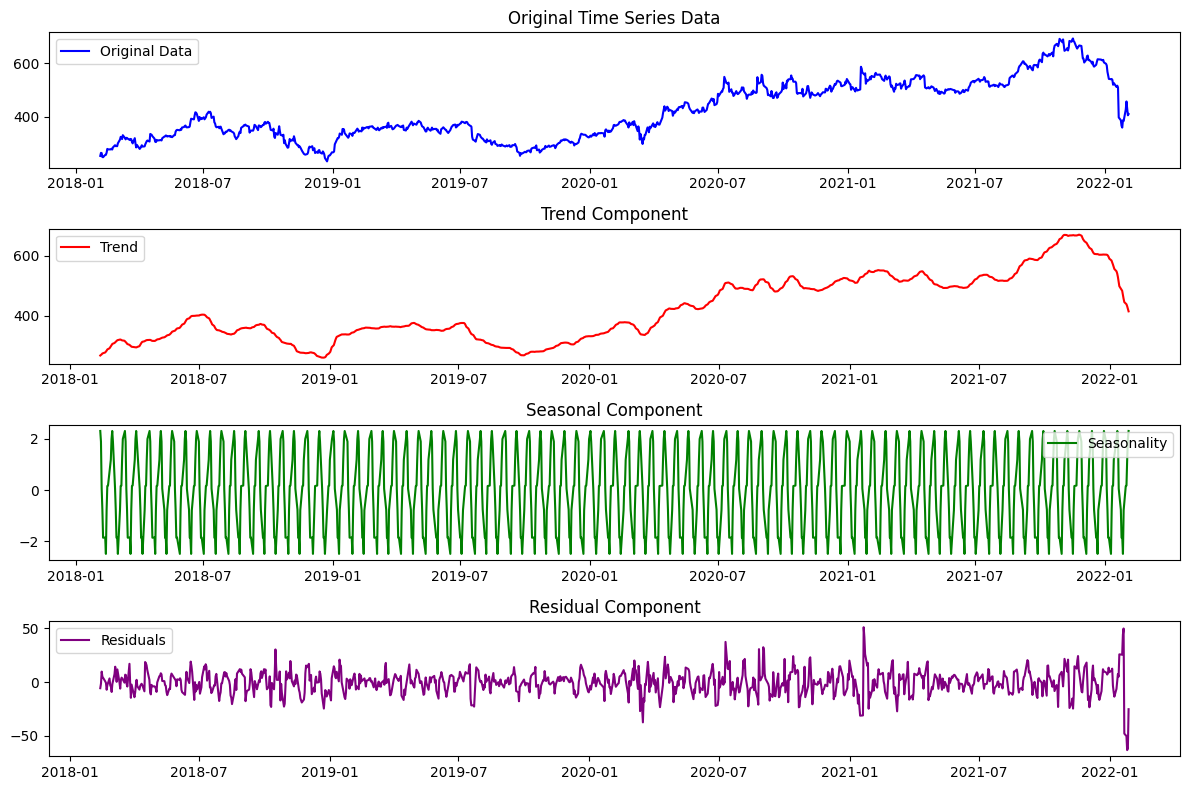

In [24]:
df['Date'] = pd.to_datetime(df['Date'])  # Adjust format only if needed
df.set_index('Date', inplace=True)

# Step 3: Work on the 'Close' column
df = df[['Close']].copy()
df.rename(columns={'Close': 'Value'}, inplace=True)

# Ensure data is regularly spaced
df = df.asfreq(pd.infer_freq(df.index))

# Drop missing values
df.dropna(inplace=True)

# Step 4: Seasonal Decomposition
# You can set period=12 for monthly data (season = 12 months), adjust based on your data
decomposed = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 5: Extract Components
df['Trend'] = decomposed.trend
df['Seasonality'] = decomposed.seasonal
df['Residuals'] = decomposed.resid

# Step 6: Plot Decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Value'], label="Original Data", color='blue')
plt.legend(loc='best')
plt.title("Original Time Series Data")

plt.subplot(4, 1, 2)
plt.plot(df['Trend'], label="Trend", color='red')
plt.legend(loc='best')
plt.title("Trend Component")

plt.subplot(4, 1, 3)
plt.plot(df['Seasonality'], label="Seasonality", color='green')
plt.legend(loc='best')
plt.title("Seasonal Component")

plt.subplot(4, 1, 4)
plt.plot(df['Residuals'], label="Residuals", color='purple')
plt.legend(loc='best')
plt.title("Residual Component")

plt.tight_layout()
plt.show()